<a href="https://colab.research.google.com/github/Joojina/project_final/blob/master/imdb_genre_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things to analyze:
1. 어떤 장르가 제일 인기 있는지
2. 가장 수익을 높이 올린 장르는
3. 국가별 장르 인기 순위 (미국/한국/ect)
4. 세대별 장르 인기 순위 (90/00/10) 



In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

In [0]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/usa_cut.csv', error_bad_lines=False, encoding='CP949')

###원천데이터 항목 목록

imdb_title_id,	title,	original_title,	year,	date_published,	genre,	duration,	country,	language,	director,	writer,	production_company,	actors,	description,	avg_vote,	votes,	budget,	usa_gross_income,	worlwide_gross_income,	metascore,	reviews_from_users,	reviews_from_critics

### 사용할 컬럼
title(제목), title_year(개봉년), s_year(90/00/10년 세대별), genres(장르), budget(예산), country(국가별), language(언어), income(WW/USA수익)

In [0]:
df.drop(['imdb_title_id','original_title','date_published','duration','director','writer','production_company','actors','description','avg_vote','votes','metascore','reviews_from_users','reviews_from_critics'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 9 columns):
title                    5193 non-null object
year                     5193 non-null int64
genre                    5193 non-null object
country                  5193 non-null object
language                 5193 non-null object
budget                   5193 non-null float64
usa_gross_income         5193 non-null int64
worlwide_gross_income    5193 non-null int64
s_year                   5193 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 365.3+ KB


In [0]:
#df.dropna(0, inplace=True)
df.fillna(0, inplace=True)

In [9]:
df.columns

Index(['title', 'year', 'genre', 'country', 'language', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 's_year'],
      dtype='object')

# 장르별 분석
- 예산을 가장 많이 쓴 장르는?
- 예산과 수입의 상관관계
- 미국에서 수익성이 가장 좋은 장르는?
- 전세계에서 가장 수익을 많이 올린 장르는? 
- 국가별 장르 인기척도
- 세대별 장르 인기척도

In [0]:
# 첫번째 장르면 추출해서 분석
df['genre_1'] = df.genre.str.split(',').str[0]

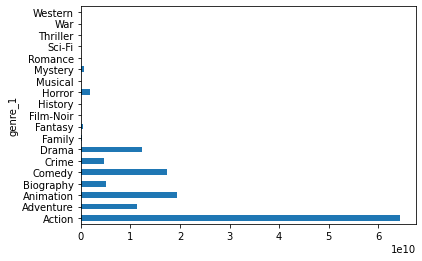

In [15]:
# 예산을 많이 쓴 장르 : 액션, 코메디, 드라마, 애니메이션, 어드벤쳐 순
df.groupby('genre_1')['budget'].sum().plot(kind='barh')  

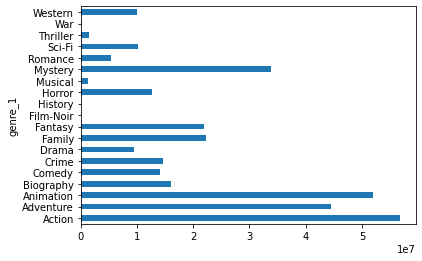

In [16]:
# 평균 예산 : 액션, 애니메이션, 어드벤처, 미스터리 순
df.groupby('genre_1')['budget'].mean().plot(kind='barh') 

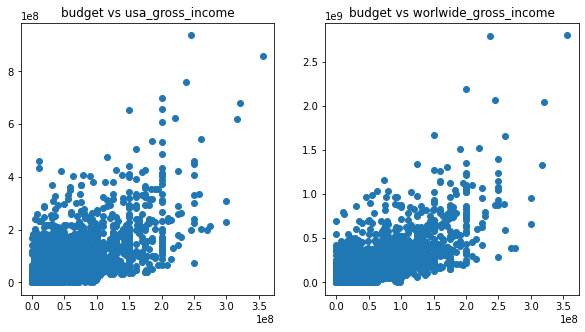

In [24]:
# 예산과 수입의 상관관계
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['usa_gross_income'])
# 북미 수익
plt.title('budget vs usa_gross_income');
plt.subplot(1, 2, 2)
plt.scatter(df['budget'], df['worlwide_gross_income'])
# 전세계 수익
plt.title('budget vs worlwide_gross_income');

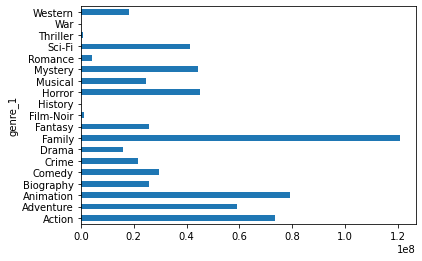

In [18]:
# 미국에서 수익성(평균값)이 가장 좋은 장르는
df.groupby('genre_1')['usa_gross_income'].mean().plot(kind='barh')

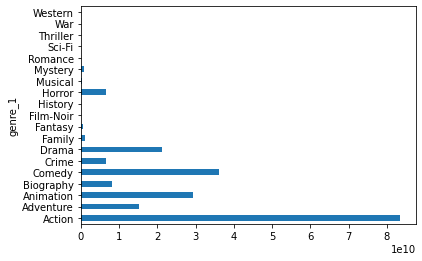

In [19]:
# 미국에서 가장 수익성(합계)이 좋은 장르 : 액션,코메디,드라마 순
df.groupby('genre_1')['usa_gross_income'].sum().plot(kind='barh')

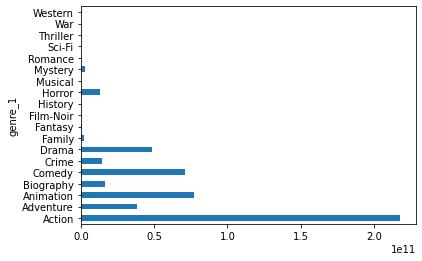

In [20]:
# 전세계 수익성(합계) : 액션, 애니메이션, 코메디, 드라마 순
df.groupby('genre_1')['worlwide_gross_income'].sum().plot(kind='barh')

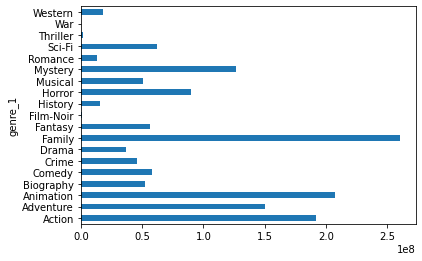

In [25]:
# 전세계 수익성(평균) : 패밀리, 애니메이션, 액션, 미스터리 순
df.groupby('genre_1')['worlwide_gross_income'].mean().plot(kind='barh')

In [0]:
# 국가1만 추출해서 분석해본다. 
df['country_1'] = df.country.str.split(',').str[0]

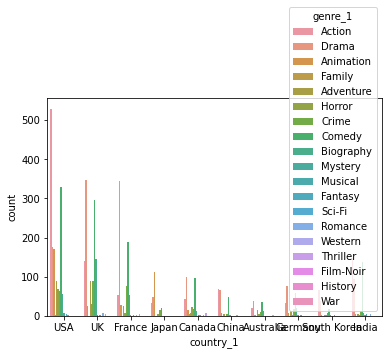

In [31]:
# 국가별 장르 인기척도
sns.countplot(x='country_1', data=df, hue='genre_1')

In [28]:
## 00년, 10년대로 넘어올수록 장르가 다양해짐
df.groupby('s_year')['genre_1'].count().sort_values(ascending=False)[:] 

s_year
10s    1869
00s    1653
90s     970
80s     701
Name: genre_1, dtype: int64

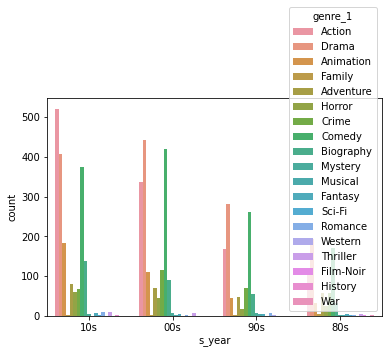

In [30]:
# 세대별 장르 인기척도
sns.countplot(x='s_year', data=df, hue='genre_1')
# 10년: Action, Comedy, Drama, 00년: Comedy, Drama, Action, 90년: Comedy, Action, Drama   